**Credit Card Fraud Detection was the first project I did while I was learning about Machine Learning Algorithms. 
Thus the code, insights and evaluation looks incomplete as I was not having enough knowledge back then.
And I dont want to change it either now. I want to keep it the way I created back then.**

## Improting Librarires

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Read the Data

In [7]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")

### Explore the Data

In [8]:
data.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


### Checking if dataset has any null or 'Nan' values

In [9]:
data.isnull().values.any()

False

### Getting statistical description of data

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Getting data info

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Setting X and y variables for deploying the Machine Learning CLassification Algorithms

In [12]:
X = data.iloc[ : , 1:30].values
y = data.iloc[ : , -1].values

### Checking if both variables imported correct number of records

In [13]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


### Visually analyzing the number of Fraud Transactions vs. Normal Transactions

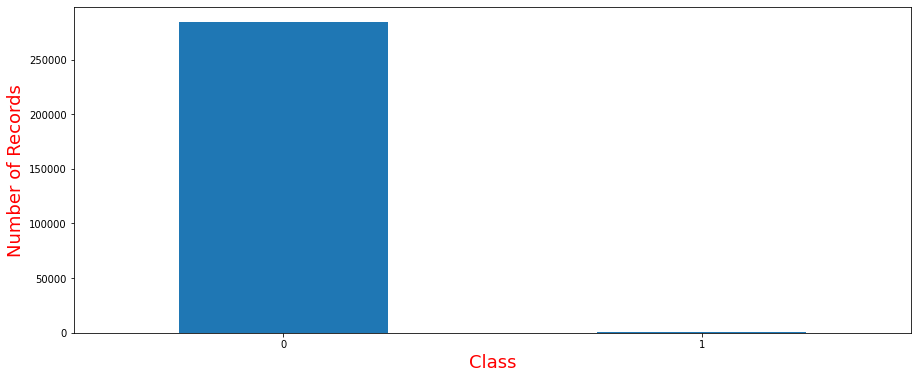

In [14]:
plt.rcParams['figure.figsize'] = (15,6)

data_class = pd.value_counts(data['Class'], sort = True)
data_class.plot(kind = 'bar', rot = 1)
plt.xticks(range(2))
plt.xlabel("Class", size = 18, color = "Red", fontname = "Verdana")
plt.ylabel("Number of Records", size = 18, color = "Red", fontname = "Verdana")
plt.show()

### Getting number of Normal Transactions

In [15]:
len(data[data.Class == 0])

284315

### Getting counts of Fraud transactions

In [16]:
len(data[data.Class == 1])

492

### Checking if no records are lost // Must macth with len(X)

In [17]:
len(data[data.Class == 0]) + len(data[data.Class == 1])

284807

### Finding coorelation between the attributes (columns) by plotting the Seaborn Heatmap

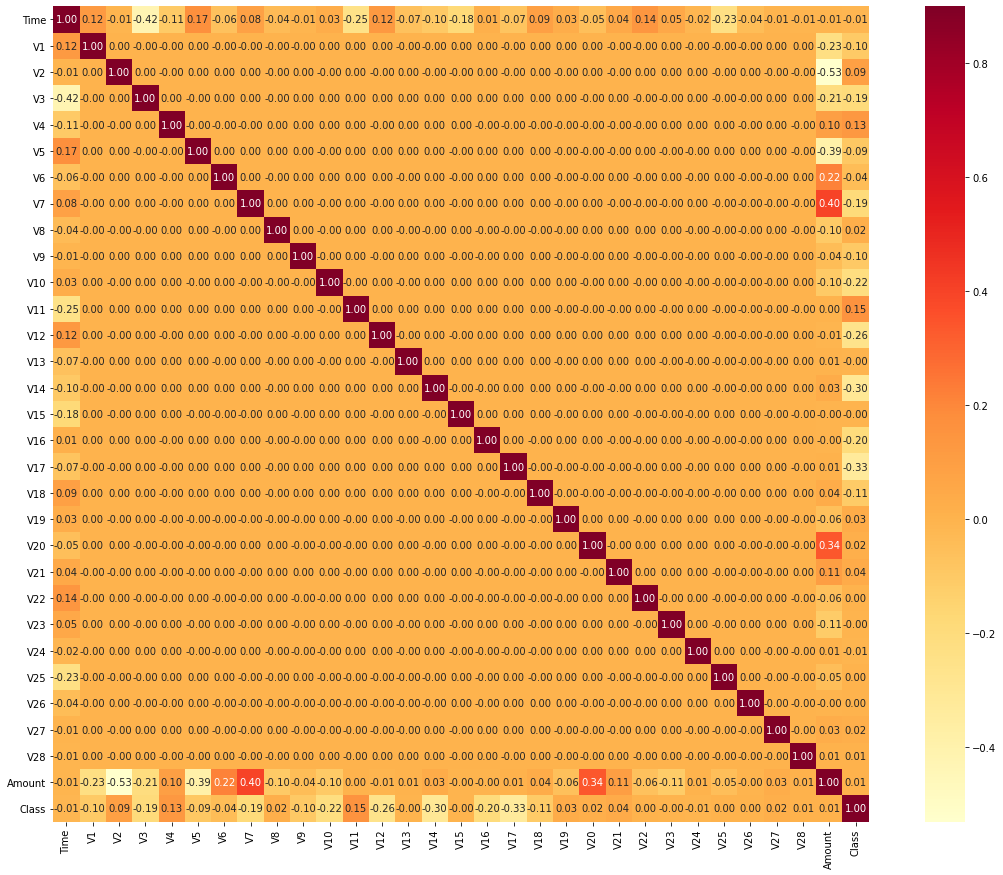

In [38]:
plt.rcParams['figure.figsize'] = (20,15)

correl = data.corr()
g=sns.heatmap(correl, square = True, cmap = 'YlOrRd', annot = True, vmax = 0.9, fmt = '.2f')
plt.show()

#Thus, none of the atrributes are correalted to each other excpet with self.

### Creating train and test set to deploy Machine Learning Algorithms

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Standardization of X_train and X_test to avoid abnormal behavior of model

In [20]:
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

### Decision Tree Classifier

In [21]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting results based on classifier being fitted above

In [22]:
y_pred_dt = classifier_dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

* To check the performance of algorithm, we will use Confusion Matrix
* It is a matrix having True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN) values as elements

### Building Confusion Matrix for Decision Trees model

In [23]:
cm1 = confusion_matrix(y_test, y_pred_dt)
cm1

array([[56840,    21],
       [   18,    83]])

* Predicting the X_test value with another Classification Algorithm Support Vector Machine
* This is done to check if SVM produces better Evaluations reuslts or not

### Model Performance Evaluation for Support Vector Machine

In [24]:
print("Decision Trees Model Performance Evaluation Meausres \n")

accuracy_dt = accuracy_score(y_test,y_pred_dt) * 100
print("Accuracy (in percent)   :", np.round(accuracy_dt, 2))

error_dt = 100 - accuracy_dt
print('Error Rate (in percent) :', np.round(error_dt, 2))

precision_dt = precision_score(y_test,y_pred_dt) * 100
print("Precision (in percent)  :", np.round(precision_dt, 2))

recall_dt = recall_score(y_test, y_pred_dt) * 100
print("Recall (in percent)     :", np.round(recall_dt, 2))

Decision Trees Model Performance Evaluation Meausres 

Accuracy (in percent)   : 99.93
Error Rate (in percent) : 0.07
Precision (in percent)  : 79.81
Recall (in percent)     : 82.18


## Support Vector Machine

### Fitting the Support Vector Machine classifier on X_train and y_train 

In [25]:
svc_classifier = SVC(kernel = "rbf", random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(random_state=0)

### Predicting results based on classifier being fitted above

In [26]:
y_pred_svm = svc_classifier.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

### Building Confusion Matrix for Support Vector Machine model

In [27]:
cm2 = confusion_matrix(y_test, y_pred_svm)
cm2

array([[56856,     5],
       [   34,    67]])

### Model Performance Evaluation for Support Vector Machine

In [28]:
print("Support Vector Machine Model Performance Evaluation Meausres \n")

accuracy_svm = accuracy_score(y_test,y_pred_svm) * 100
print("Accuracy (in percent)   :", np.round(accuracy_svm, 2))

error_svm = 100 - accuracy_svm
print('Error Rate (in percent) :', np.round(error_svm, 2))

precision_svm = precision_score(y_test,y_pred_svm) * 100
print("Precision (in percent)  :", np.round(precision_svm, 2))

recall_svm = recall_score(y_test, y_pred_svm) * 100
print("Recall (in percent)     :", np.round(recall_svm, 2))

Support Vector Machine Model Performance Evaluation Meausres 

Accuracy (in percent)   : 99.93
Error Rate (in percent) : 0.07
Precision (in percent)  : 93.06
Recall (in percent)     : 66.34


**Thus, based on above 2 evaluations of both models, both perfomed equally well with Decision Tree having slightly higher performance.**